In [11]:
from functions import *

In [12]:
n = 7

In [13]:
num_random_models = 100
num_temperatures = 50

T_arr = np.geomspace(0.001, 1000, num_temperatures)

delta_random_arr = np.zeros((num_temperatures, num_random_models))
delta_local_arr = np.zeros((num_temperatures, num_random_models))
delta_quantum_arr = np.zeros((num_temperatures, num_random_models))
delta_mismatched_quantum_arr = np.zeros((num_temperatures, num_random_models))

for T_index in tqdm(range(num_temperatures)):
    T = T_arr[T_index]
    np.random.seed(0) # set the seed for reproducibility
    for i in range(num_random_models):
        m = RandomIsingModel(n)

        proposal_mat_random = get_proposal_mat_random(m)
        P_random = get_transition_matrix(m, T, proposal_mat_random)
        delta_random = get_delta(P_random)
        delta_random_arr[T_index][i] = delta_random

        proposal_mat_local = get_proposal_mat_local(m)
        P_local = get_transition_matrix(m, T, proposal_mat_local)
        delta_local = get_delta(P_local)
        delta_local_arr[T_index][i] = delta_local
    
        proposal_mat_quantum = get_proposal_mat_quantum_layden(m)
        P_quantum = get_transition_matrix(m, T, proposal_mat_quantum)
        delta_quantum = get_delta(P_quantum)
        delta_quantum_arr[T_index][i] = delta_quantum

        m_mismatched = RandomIsingModel(n)
        proposal_mat_mismatched_quantum = get_proposal_mat_quantum_layden(m_mismatched)
        P_mismatched_quantum = get_transition_matrix(m, T, proposal_mat_mismatched_quantum)
        delta_mismatched_quantum = get_delta(P_mismatched_quantum)
        delta_mismatched_quantum_arr[T_index][i] = delta_mismatched_quantum

100%|██████████| 50/50 [2:01:41<00:00, 146.03s/it]  


In [14]:
# Take an average over random Ising instances
delta_random_arr_avg = np.mean(delta_random_arr, axis=1)
delta_random_arr_std = np.std(delta_random_arr, axis=1)

delta_local_arr_avg = np.mean(delta_local_arr, axis=1)
delta_local_arr_std = np.std(delta_local_arr, axis=1)

delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=1)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=1)

delta_mismatched_quantum_arr_avg = np.mean(delta_mismatched_quantum_arr, axis=1)
delta_mismatched_quantum_arr_std = np.std(delta_mismatched_quantum_arr, axis=1)

In [16]:
# Save the results for long sweeps
T_sweep = {'local': delta_local_arr,
           'uniform': delta_random_arr,
           'quantum': delta_quantum_arr,
           'mismatched': delta_mismatched_quantum_arr}

In [19]:
# pickle.dump(T_sweep, open('T_sweep_n7.p','wb'))
# T_sweep = pickle.load(open('T_sweep_n7.p','rb'))

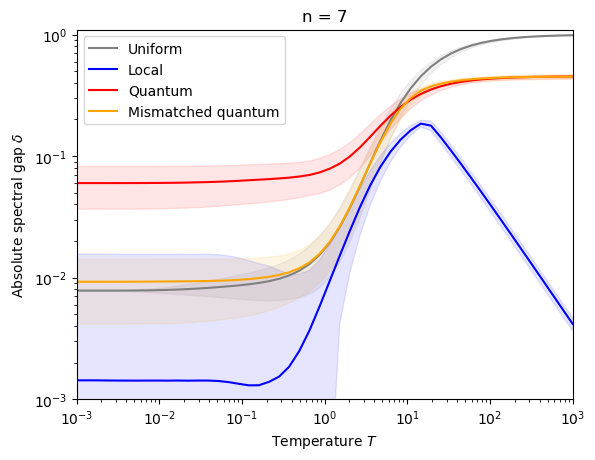

In [15]:
plt.plot(T_arr, delta_random_arr_avg, '-', color='grey', label = 'Uniform')
plt.plot(T_arr, delta_local_arr_avg, '-', color='blue', label = 'Local')
plt.plot(T_arr, delta_quantum_arr_avg, '-', color='red', label = 'Quantum')
plt.plot(T_arr, delta_mismatched_quantum_arr_avg, '-', color='orange', label = 'Mismatched quantum')

plt.fill_between(T_arr, 
                 delta_random_arr_avg-delta_random_arr_std, 
                 delta_random_arr_avg+delta_random_arr_std, 
                 color='grey',
                 alpha=0.1)
plt.fill_between(T_arr, 
                 delta_local_arr_avg-delta_local_arr_std, 
                 delta_local_arr_avg+delta_local_arr_std, 
                 color='blue',
                 alpha=0.1)
plt.fill_between(T_arr, 
                 delta_quantum_arr_avg-delta_quantum_arr_std, 
                 delta_quantum_arr_avg+delta_quantum_arr_std, 
                 color='red',
                 alpha=0.1)
plt.fill_between(T_arr, 
                 delta_mismatched_quantum_arr_avg-delta_mismatched_quantum_arr_std, 
                 delta_mismatched_quantum_arr_avg+delta_mismatched_quantum_arr_std, 
                 color='orange',
                 alpha=0.1)

plt.title(f'n = {n}')
plt.xlabel('Temperature $T$')
plt.ylabel('Absolute spectral gap $\delta$')
plt.ylim(0.001, 1.1)
plt.xlim(0.001, 1000)
plt.yscale('log')
plt.xscale('log')
plt.legend()